# 3d CNN

**Goals:** 

1. Play with the dimension uniformity of the three layers
2. Use the uniform dimension layers to train our first 3d CNN model!
3. Start doing some coarse playing with hyperparameters interactively to understand the problem better :-)

In [1]:
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim

# Loading the other modules I have in parent directories
import sys
PYTHONPATH="../"
sys.path.append(PYTHONPATH)
from dataProcessing import getDataLoaders
from models import FCNet, CNN_3d, layer0_12x12, layer2_12x12, layer0_3x6, count_parameters
from train import check_accuracy, train
from plottingFcts import trainingMetrics, sigBkgEff, plotROC, plotConfusion

# Some more magic so that the notebook will reload external python modules;
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2

/home/shared/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
loader_train, loader_val, loader_test = getDataLoaders(batch_size=256)

In [4]:
myModel = CNN_3d(spatialDim=(3,6),preConvParams={'nF':32},
                 nFilters_1=32, filter_1= (3,3,3), stride_1=(1,1,1), padding_1=(1,1,1),
                 nFilters_2=16, filter_2= (3,3,2), stride_2=(2,2,2), padding_2=(1,1,1),
                 h1_dim=150, h2_dim=100)
print(myModel)

Output size after the first conv: 32,3.0,3.0,6.0
Output size after the second conv: 16,2.0,2.0,4.0
CNN_3d(
  (layer0_preConv): Sequential(
    (0): Conv2d(1, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): MaxPool2d(kernel_size=(1, 2), stride=(1, 2), padding=0, dilation=1, ceil_mode=False)
    (4): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (5): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (6): ReLU()
    (7): MaxPool2d(kernel_size=(1, 2), stride=(1, 2), padding=0, dilation=1, ceil_mode=False)
    (8): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (10): ReLU()
    (11): MaxPool2d(kernel_size=(1, 2), stride=(1, 2), padding=0, dilation=1, ceil_mode=False)
    (12): Conv2d(32, 32, kernel_size=(

In [5]:
myModel.modelName

'cnn3d_3x6_C32_F333_S111_P111_C16_F332_S222_P111_fc_150_100_dpt_0.5'

**Sanity check:**
Look at the model accuracy before you start training!

In [6]:
check_accuracy(loader_val, myModel)

cuda
Got 9447 / 30000 correct (31.49)


In [7]:
count_parameters(myModel)

139173

Perfect, close to 33%, as expected!

## Train the model

In [12]:
optimizer = optim.Adam(myModel.parameters(), lr = 1e-6)

In [13]:
history, myModel = train(loader_train, loader_val, myModel, 
                         optimizer, epochs=25, returnBest=True)

cuda

Epoch 1/25:
Iteration 0, loss = 0.4540
cuda
Got 23233 / 30000 correct (77.44)

Iteration 100, loss = 0.4327
cuda
Got 23241 / 30000 correct (77.47)

Iteration 200, loss = 0.3869
cuda
Got 23269 / 30000 correct (77.56)

Iteration 300, loss = 0.4687
cuda
Got 23254 / 30000 correct (77.51)

Iteration 400, loss = 0.4632
cuda
Got 23260 / 30000 correct (77.53)

Iteration 500, loss = 0.4346
cuda
Got 23219 / 30000 correct (77.40)

Iteration 600, loss = 0.4056
cuda
Got 23270 / 30000 correct (77.57)

Iteration 700, loss = 0.4161
cuda
Got 23259 / 30000 correct (77.53)

cuda
Got 23249 / 30000 correct (77.50)
cuda
Got 139776 / 180000 correct (77.65)

Epoch 2/25:
Iteration 0, loss = 0.4508
cuda
Got 23230 / 30000 correct (77.43)

Iteration 100, loss = 0.4240
cuda
Got 23233 / 30000 correct (77.44)

Iteration 200, loss = 0.4409
cuda
Got 23229 / 30000 correct (77.43)

Iteration 300, loss = 0.3961
cuda
Got 23260 / 30000 correct (77.53)

Iteration 400, loss = 0.4575
cuda
Got 23296 / 30000 correct (77.6

Iteration 700, loss = 0.4371
cuda
Got 23279 / 30000 correct (77.60)

cuda
Got 23282 / 30000 correct (77.61)
cuda
Got 139995 / 180000 correct (77.78)

Epoch 14/25:
Iteration 0, loss = 0.4403
cuda
Got 23279 / 30000 correct (77.60)

Iteration 100, loss = 0.3801
cuda
Got 23253 / 30000 correct (77.51)

Iteration 200, loss = 0.4528
cuda
Got 23265 / 30000 correct (77.55)

Iteration 300, loss = 0.4223
cuda
Got 23263 / 30000 correct (77.54)

Iteration 400, loss = 0.4372
cuda
Got 23248 / 30000 correct (77.49)

Iteration 500, loss = 0.4035
cuda
Got 23276 / 30000 correct (77.59)

Iteration 600, loss = 0.4095
cuda
Got 23318 / 30000 correct (77.73)

Iteration 700, loss = 0.4065
cuda
Got 23313 / 30000 correct (77.71)

cuda
Got 23259 / 30000 correct (77.53)
cuda
Got 139850 / 180000 correct (77.69)

Epoch 15/25:
Iteration 0, loss = 0.4418
cuda
Got 23271 / 30000 correct (77.57)

Iteration 100, loss = 0.4305
cuda
Got 23282 / 30000 correct (77.61)

Iteration 200, loss = 0.4126
cuda
Got 23266 / 30000 corre

### Experiments
1. Try increasing the number of nodes in the output layer to see if you're losing too much info from these initial convolutions.
The acc got up to about 74.5%, but was then plateauing, so I stopped the the training. Then... I tried adding another hidden layer (so 3 fc layers before classification) to see if I was eroding too much of the model info when I was doing these up and down sampling pre-convolutions. The accuracy got up to 75.47%, so I'm going to try *decreasing* the learning rate by a factor of 10 (so now $\alpha=10^{-5}$) and trying another 10 epochs of training, and that got it down to 75.86% accuracy.
Just to be sure I knew *where* my improvements were coming from, and that I was comparing apples to apples, I tried retraining with two final fc layers using $\alpha=10^{-4}$ for 10 epochs, and then $\alpha=10^{-5}$ for another 10 epochs. This didn't help my validation accuracy at all, but I decided not to use 3 fc layers for my next few experiments, keeping in mind that these are the types of gains I should be able to achieve by tweaking the convolutional layers.

2. Next I tried doubling the number of filters in my two 3d convolutional layers to 32 and 16. This helped a little bit (75% accuracy), but I think the issue is that I need a better pre-convolutional architecture.

3. Try using 8 channels for each of the pre-conv layers
    - For layer0, I ended up using 4 filters for the downsampling convolution, and 8 filters for the upsampling convolution.
    Now I'm at 75% within 3 epochs... (not bad), and my validation acc after 10 epochs with $\alpha=1e-4$ is 75.68%. After training another 10 epochs with $\alpha=1e-5$, the val acc gets up to 75.87%
    
4. How far can this "new idea" take us? Try increasing the number of these preprocessing channels to 16 $\rightarrow$ 76.46% accuracy 

5. For layer2, instead of just duplicating this layer 16 times, try a filter with $3\times3$ filters that is weight preserving so you can learn different higher level features from this repn while preserving the spatial information.
I got to ()% accuracy, so I don't really think that that helped. But now that I'm  using more features, should I be using more overfitting safeguards, like batchnorm + dropout?
I tried that, it didn't really help, 74.84% val acc ;-(

When I tried a different lr schedule (15 epochs $\alpha = 2.5e-5$, and then another 15 with $\alpha=5e-6$), I got to 76.55% acc.

### Downsampling ALL layers

When we talked with Michael, he said he really didn't have an intuition for whether it would be helpful or not to upsample to the larger dimension to get the dimensions the same. The experiments that I conducted above show 

1. I wrote some new downsampling layers that use 2d convolutions and downsampling layers to compress the image. The default filters from the 3d-convolutions no longer fit, so I decided first to not compress the image, but use $3 \times 3 \times 3$ filters with a stride of 1 to compress info from across the image: 10 epochs 2.5e-5, 5 epochs 2.5e-6: 76.57%

2. Next: Try adding 2d BatchNorm in the pre-convolutional layers (it was acutally really stupid of me not to have tried this before) 5 epochs for 2.5e-5, 2.5e-6, 1e-6 $\rightarrow 77.3%$. *First time I broke 77% with a convolutional model!!!*
But I feel like the major lesson here is it's *very* important to be careful with these preconvolutional layers to not wash away too much of the information.

There are *a lot* of params in the current network right now: 186k! I saw with the fc when I increased the number of parameters, the performance got *worse*, so try to find some ways to *reduce* the number of parameters. 

The bottleneck is probably the connection from the 3d conv to the fc layers.

3. Increase the stride of the last 3d convolutional layer (need to adjust the filters a bit as well): filter_2= (3,3,2), stride_2=(2,2,2), padding_2=(1,1,1). This decreases the size of the image after this layer, and increases
~ 90k parameters, just about the same as my best performing fc net.
    - After training *only* for 5 epochs ($\alpha = 2.5e-5 \rightarrow$) 77.2% accuracy!!
    - Another 5 epochs $\alpha = 2.5e-6 \rightarrow 77.6%$ accuracy
    
4. Try increasing the number of filters for the 2d convolutions from 16 to 32. 
   After 5 epcohs, $\alpha = 2.5e-5$, I got 77.4% accuracy. Then 10 epochs, $\alpha = 1e-5$, 77.6%. 10 epochs $\alpha = 2e-6$, 77.84%. 3 epochs $\alpha = 1e-6$ (b/c I needed to go to class), 77.6%.

These parameter weights are changed from their initial values, so this looks ok!

In [14]:
check_accuracy(loader_val, myModel)

cuda
Got 23308 / 30000 correct (77.69)


In [15]:
check_accuracy(loader_test, myModel)

cuda
Got 69747 / 90000 correct (77.50)


### Model evaluation metrics

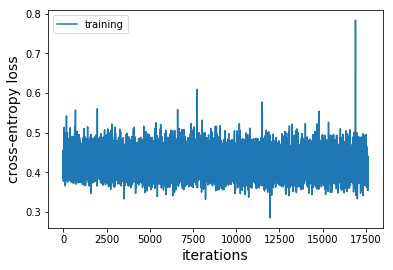

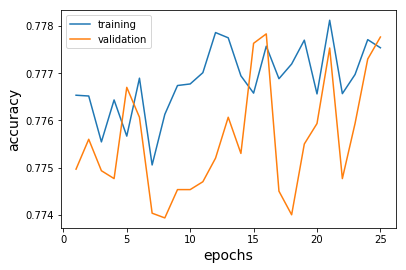

In [16]:
trainingMetrics(history)

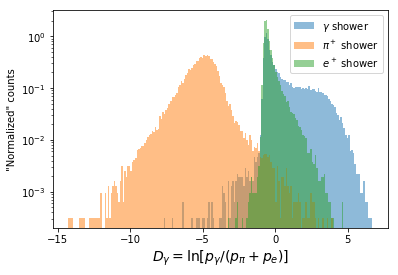

../plottingFcts.py:229: RuntimeWarning: divide by zero encountered in true_divide
  plt.semilogy(teff, np.divide(1,beff), style, color=color, label=label)


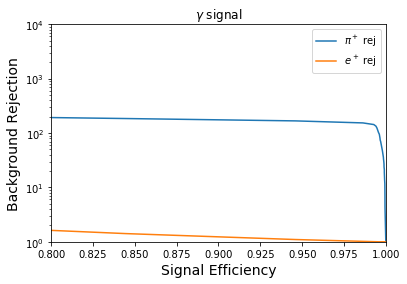

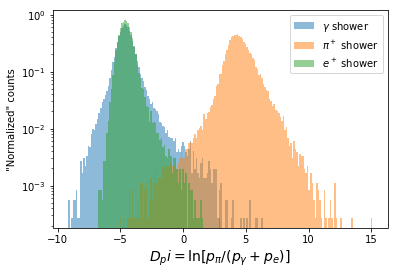

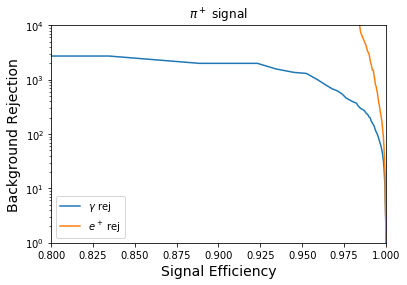

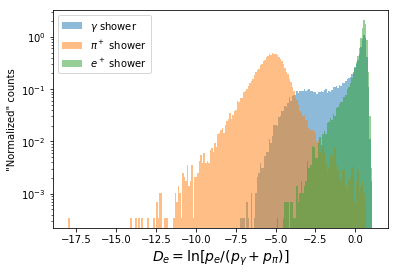

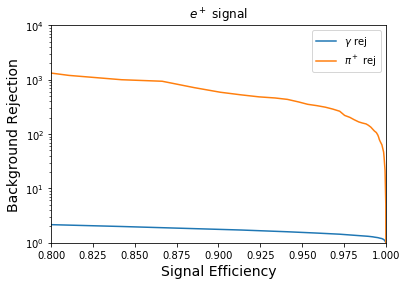

In [17]:
particles = ['gamma','pi','e']

for node in range(3):
    g_eff, pi_eff, e_eff = sigBkgEff(myModel, loader_test, node)
    mTag = '{}-sig_{}'.format(particles[node], myModel.modelName)
    
    # Plot the ROC curve using node as the signal and the other two as the bkg
    if node == 0:
        plotROC([g_eff, g_eff], [pi_eff, e_eff], ['$\pi^+$ rej', '$e^+$ rej'], title='$\gamma$ signal', tag=mTag)
    if node == 1:
        plotROC([pi_eff, pi_eff], [g_eff, e_eff], ['$\gamma$ rej', '$e^+$ rej'], title='$\pi^+$ signal', tag=mTag)
    elif node == 2:
        plotROC([e_eff, e_eff], [g_eff, pi_eff], ['$\gamma$ rej', '$\pi^+$ rej'], title='$e^+$ signal', tag=mTag)
        

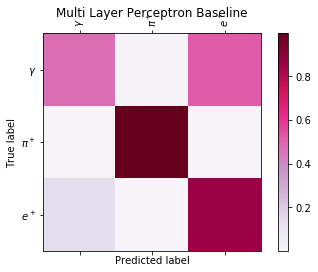

In [18]:
plotConfusion(myModel, loader_val, title="Multi Layer Perceptron Baseline")

### Goals:
- Print the number of parameters for each model
- Just change hyperparameters (by hand) to get more intuition for the problem
- Maybe try downsampling to (6,3) instead of upsampling to (12,12)
- Could try adding a learning rate scheduler
- Try changing the optimizer

# Recurrent CNN

- Apply three 2d convolutions to get a fixed size for the image vector!